# Task 7

## Task 7a

Read the following set of codes and find out how they work. Then, change the following
parameters: scale_factor, Angle, low/high bounds to see their effects.

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

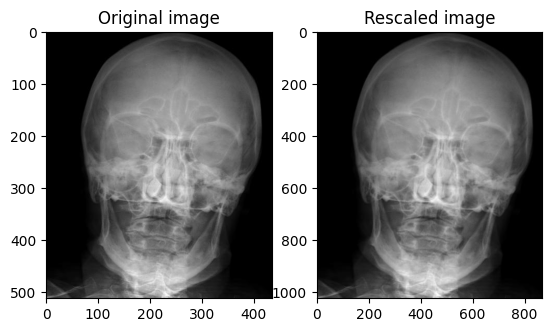

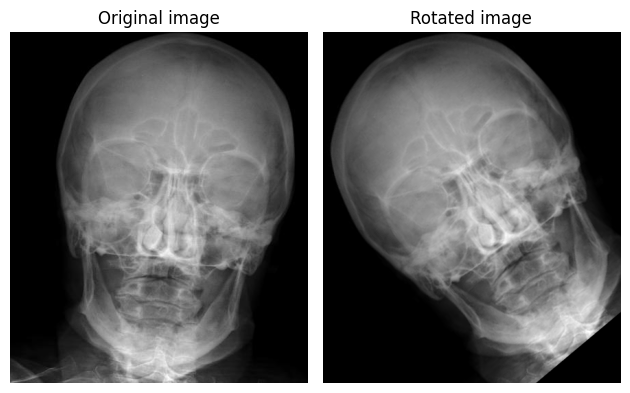

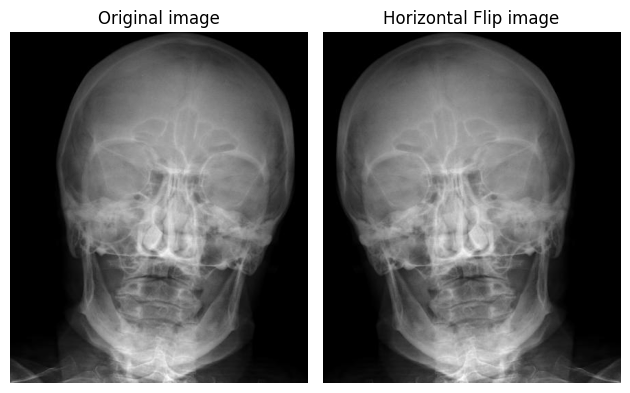

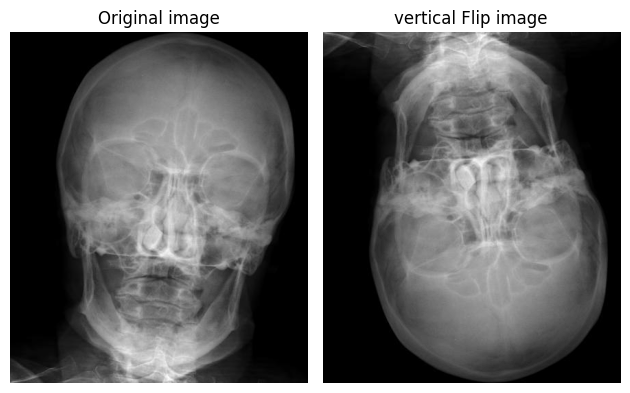

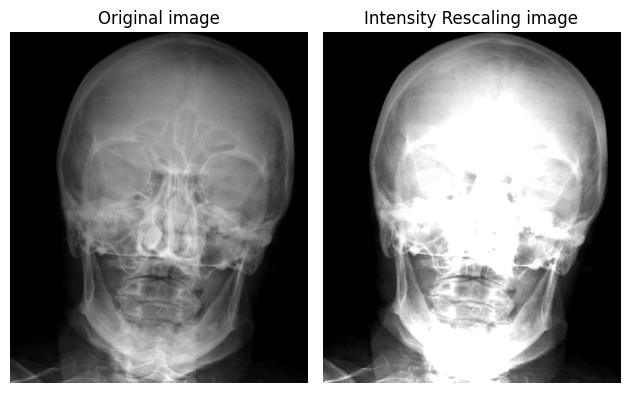

In [20]:
sample_dir = '../../Data/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape
def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:
        ax[0].axis('off')
        ax[1].axis('off')
        plt.tight_layout()
    plt.show()

# Scaling
scale_factor = 2
image_rescaled = rescale(img, scale_factor)
show_paired(img, image_rescaled, "Rescaled")
# Roation
angle = 40
image_rotated = rotate(img, angle)
show_paired(img, image_rotated, "Rotated")
# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')
# Vertical Flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'vertical Flip')
# Intensity rescaling
low_bound, high_boud = 6, 80
min_val, max_val = np.percentile(img, (low_bound, high_boud))
better_contrast = exposure.rescale_intensity(img, in_range=(min_val, max_val)) 
show_paired(img, better_contrast, 'Intensity Rescaling')

## Task 7b

A practical way to perform the data augmentation technique is to develop a generator.
The following code is an example of how you can generate augmented images randomly with a
TensorFlow built-in generator.

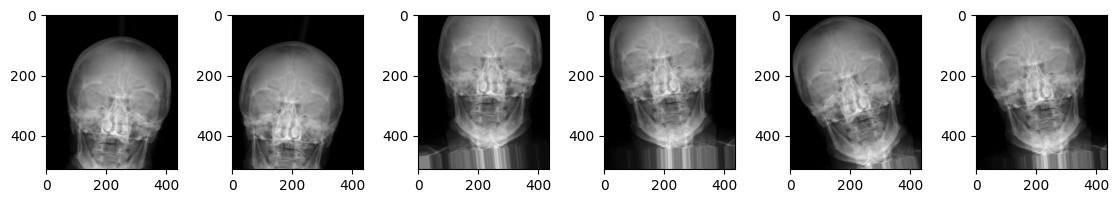

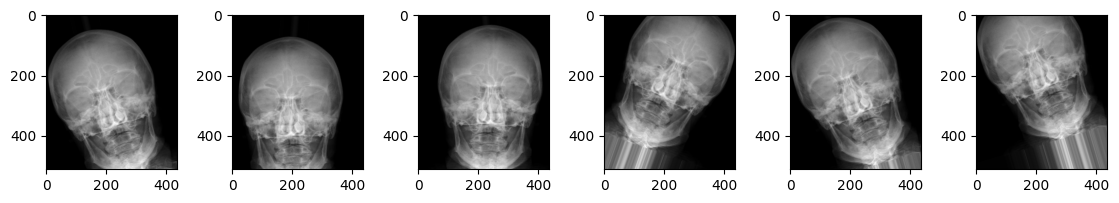

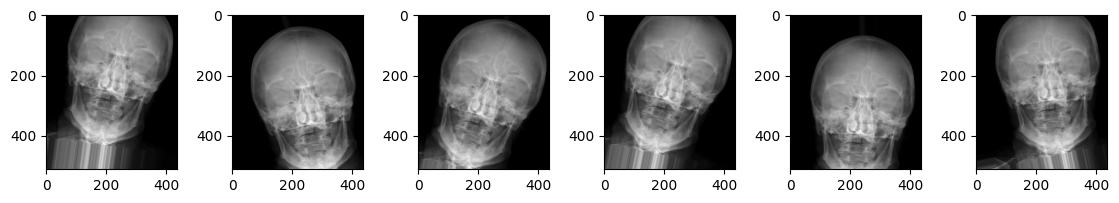

In [6]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img

Sample = '../../Data/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
count = 5
my_gen = ImageDataGenerator(rotation_range = 20,
width_shift_range = 0.2,
horizontal_flip = True)
fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = my_gen.flow(Img, batch_size=1)
for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break
plt.show()